In [155]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sn
import sklearn

from tensorflow import keras
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression as LogRes
from sklearn.metrics import classification_report as report
from sklearn.metrics import precision_score as precision 
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix

from utils import * 
from models import * 


%matplotlib inline
print("numpy version: \t\t", np.__version__)
print("pandas version: \t", pd.__version__)
print("matplotlib version: \t", matplotlib.__version__)
print("tensorflow version: \t", tf.__version__)
print("scikit-learn version: \t", sklearn.__version__)
print("seaborn version: \t", sn.__version__)

numpy version: 		 1.19.2
pandas version: 	 1.2.3
matplotlib version: 	 3.3.4
tensorflow version: 	 2.3.0
scikit-learn version: 	 0.24.1
seaborn version: 	 0.11.1


In [2]:
###Initial Baseline Models 

x_train, y_train = load_data("../data/Simulated_Data_Train.csv")
x_val, y_val = load_data("../data/Simulated_Data_Validation.csv")
x_test, y_test = load_data("../data/Simulated_Data_Test.csv")


In [4]:
nn = feed_forward(x_train, y_train, width = 32)
nn.train(20)


print("****** Initial Feed Forward Network *********")
print(report(y_test, nn.predict(x_test)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                1024      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 0s 728us/step - loss: 5.0992
Epoch 2/20
625/625 [==============================] - 0s 648us/step - loss: 3.4032
Epoch 3/20
625/625 [==============================] - 0s 565us/step - loss: 2.2437
Epoch 4/20
625/625 [==============================] - 0s 579us/step - loss: 1.9951
Epoch 5/20
625/625 [==============================] - 0s 563us/step - loss: 1.5913
Epoch 6/20
625/625 [==============================] - 0s 560us/step - loss: 0.8759
Epoch 7/20
625/6

In [36]:
def tune_model_width(build_fn, x_train, y_train, x_val, y_val, max_width = 50): 
    """
    Takes a 3-Layer nueral network and expands width to see if there 
    are tangible benefits to increasing the width of the hidden layer 
    in the model. 
    
    Parameters: 
    build_fn - function that returns a keras nn model with the specified parameters 
    x_train - the data matrix 
    y_train - the response function
    x_val - validation data
    y_val - validation data function
    """
    
    acc = []
    pre = []
    rec = []
        
    for i in range(15, max_width): 
        width = i
        model = feed_forward.build_model(x_train, y_train, width = width, suppress = True)
        model.fit(x_train, y_train, epochs = 100, verbose = 0)
    
        y_val_prob = model.predict(x_val)[:,0]
        y_val_hat = decide(y_val_prob, 0.5)

        acc.append(accuracy(y_val, y_val_hat))
        pre.append(precision(y_val, y_val_hat))
        rec.append(recall(y_val, y_val_hat))
    
    return acc, pre, rec 

acc, pre, rec = tune_model_width(feed_forward.build_model, 
                                 x_train, y_train, x_val, y_val)

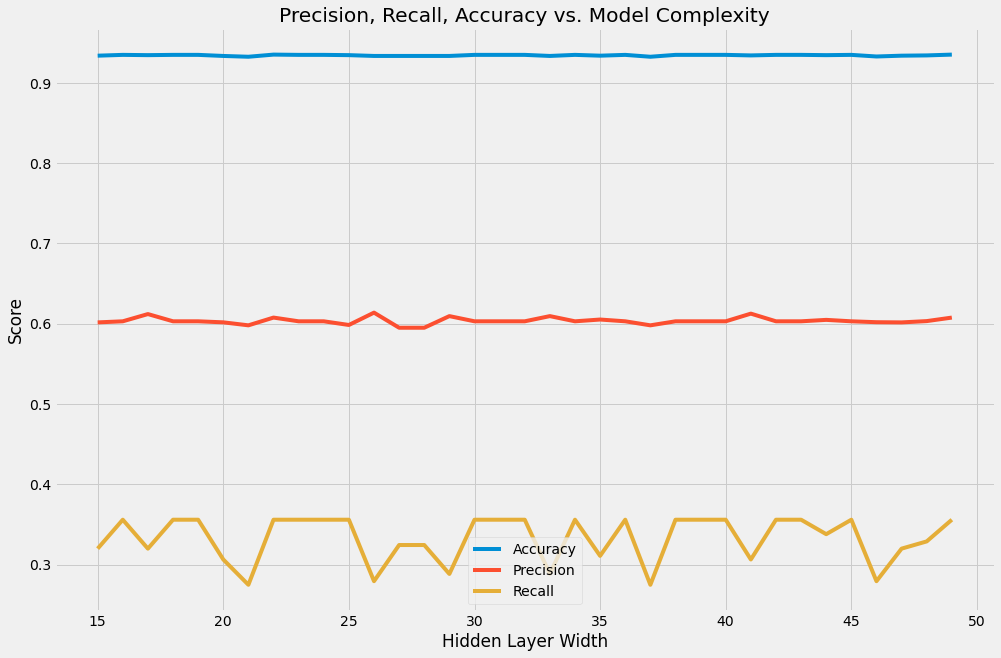

In [37]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [15, 10]

plt.title("Precision, Recall, Accuracy vs. Model Complexity")
plt.xlabel("Hidden Layer Width")
plt.ylabel("Score")

width = [_ for _ in range(15, 50)]

plt.plot(width, acc)
plt.plot(width, pre)
plt.plot(width, rec)
plt.legend(["Accuracy", "Precision", "Recall"])
plt.savefig("nn_width.png")

In [12]:
import tqdm

precision_scores = []
recall_scores = []

for i in tqdm.tqdm(range(100)): 
    model = feed_forward(x_train, y_train, width = 32)
    model.model.fit(x_train, y_train, epochs = 100, verbose = 0)
    yhat = model.predict(x_test) 
    precision_scores.append(precision(y_test, yhat))
    recall_scores.append(recall(y_test, yhat))
    


  0%|                                                                                                                                                                                                                                                                       | 0/100 [00:00<?, ?it/s]

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  1%|██▌                                                                                                                                                                                                                                                            | 1/100 [00:26<43:24, 26.31s/it]

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  2%|█████                                                                                                                                                                                                                                                          | 2/100 [00:52<42:39, 26.12s/it]

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  3%|███████▋                                                                                                                                                                                                                                                       | 3/100 [01:18<42:27, 26.27s/it]

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  4%|██████████▏                                                                                                                                                                                                                                                    | 4/100 [01:44<41:57, 26.23s/it]

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  5%|████████████▊                                                                                                                                                                                                                                                  | 5/100 [02:12<42:03, 26.56s/it]

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  6%|███████████████▎                                                                                                                                                                                                                                               | 6/100 [02:41<42:56, 27.40s/it]

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  7%|█████████████████▊                                                                                                                                                                                                                                             | 7/100 [03:09<42:54, 27.69s/it]

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  8%|████████████████████▍                                                                                                                                                                                                                                          | 8/100 [03:37<42:31, 27.74s/it]

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


  9%|██████████████████████▉                                                                                                                                                                                                                                        | 9/100 [04:09<44:09, 29.12s/it]

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 10%|█████████████████████████▍                                                                                                                                                                                                                                    | 10/100 [04:40<44:37, 29.75s/it]

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 11%|███████████████████████████▉                                                                                                                                                                                                                                  | 11/100 [05:06<42:28, 28.63s/it]

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 12%|██████████████████████████████▍                                                                                                                                                                                                                               | 12/100 [05:33<41:10, 28.07s/it]

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 13%|█████████████████████████████████                                                                                                                                                                                                                             | 13/100 [05:59<39:55, 27.54s/it]

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 14%|███████████████████████████████████▌                                                                                                                                                                                                                          | 14/100 [06:25<38:38, 26.96s/it]

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 15%|██████████████████████████████████████                                                                                                                                                                                                                        | 15/100 [06:50<37:37, 26.56s/it]

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 16%|████████████████████████████████████████▋                                                                                                                                                                                                                     | 16/100 [07:16<36:42, 26.22s/it]

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 17%|███████████████████████████████████████████▏                                                                                                                                                                                                                  | 17/100 [07:41<35:54, 25.95s/it]

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 18%|█████████████████████████████████████████████▋                                                                                                                                                                                                                | 18/100 [08:06<35:07, 25.70s/it]

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 19%|████████████████████████████████████████████████▎                                                                                                                                                                                                             | 19/100 [08:32<34:33, 25.60s/it]

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 20%|██████████████████████████████████████████████████▊                                                                                                                                                                                                           | 20/100 [08:57<33:49, 25.37s/it]

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 21%|█████████████████████████████████████████████████████▎                                                                                                                                                                                                        | 21/100 [09:22<33:15, 25.26s/it]

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 22%|███████████████████████████████████████████████████████▉                                                                                                                                                                                                      | 22/100 [09:47<32:43, 25.18s/it]

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 23%|██████████████████████████████████████████████████████████▍                                                                                                                                                                                                   | 23/100 [10:12<32:21, 25.22s/it]

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 24%|████████████████████████████████████████████████████████████▉                                                                                                                                                                                                 | 24/100 [10:37<31:57, 25.23s/it]

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 25%|███████████████████████████████████████████████████████████████▌                                                                                                                                                                                              | 25/100 [11:03<31:49, 25.46s/it]

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 26%|██████████████████████████████████████████████████████████████████                                                                                                                                                                                            | 26/100 [11:28<31:18, 25.39s/it]

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 27%|████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 27/100 [11:53<30:47, 25.31s/it]

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 28%|███████████████████████████████████████████████████████████████████████                                                                                                                                                                                       | 28/100 [12:20<30:44, 25.62s/it]

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 29%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                    | 29/100 [12:45<30:17, 25.60s/it]

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 30%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                 | 30/100 [13:11<29:52, 25.60s/it]

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 31%|██████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                               | 31/100 [13:37<29:27, 25.62s/it]

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 32%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 32/100 [14:02<29:02, 25.63s/it]

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 33%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                          | 33/100 [14:27<28:26, 25.46s/it]

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 34%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                       | 34/100 [14:52<27:53, 25.36s/it]

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 35%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                     | 35/100 [15:18<27:31, 25.41s/it]

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 36%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                  | 36/100 [15:43<26:59, 25.31s/it]

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 37%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                | 37/100 [16:09<26:48, 25.53s/it]

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 38%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 38/100 [16:35<26:27, 25.61s/it]

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 39%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                           | 39/100 [17:00<25:54, 25.49s/it]

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 40%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                        | 40/100 [17:25<25:19, 25.32s/it]

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 41%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                     | 41/100 [17:50<24:51, 25.28s/it]

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 42/100 [18:16<24:28, 25.32s/it]

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 43/100 [18:41<24:01, 25.29s/it]

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                              | 44/100 [19:08<24:06, 25.83s/it]

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                           | 45/100 [19:34<23:38, 25.78s/it]

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 46/100 [19:59<23:10, 25.75s/it]

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                      | 47/100 [20:25<22:42, 25.71s/it]

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                    | 48/100 [20:50<22:12, 25.63s/it]

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                 | 49/100 [21:16<21:40, 25.50s/it]

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                               | 50/100 [21:42<21:24, 25.68s/it]

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_177 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 51/100 [22:07<21:00, 25.73s/it]

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                          | 52/100 [22:35<21:03, 26.33s/it]

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 53/100 [23:00<20:21, 25.98s/it]

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 54/100 [23:26<19:45, 25.77s/it]

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                  | 55/100 [23:51<19:19, 25.77s/it]

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                               | 56/100 [24:17<18:46, 25.60s/it]

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                             | 57/100 [24:43<18:24, 25.69s/it]

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                          | 58/100 [25:08<17:50, 25.49s/it]

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 59/100 [25:33<17:21, 25.40s/it]

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_194 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                     | 60/100 [25:58<16:51, 25.30s/it]

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 61/100 [26:23<16:24, 25.25s/it]

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 62/100 [26:48<15:58, 25.22s/it]

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 63/100 [27:14<15:39, 25.39s/it]

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_202 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 64/100 [27:40<15:22, 25.61s/it]

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 65/100 [28:05<14:50, 25.45s/it]

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 66/100 [28:30<14:18, 25.26s/it]

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 67/100 [28:55<13:53, 25.27s/it]

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 68/100 [29:20<13:27, 25.22s/it]

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 69/100 [29:46<13:08, 25.42s/it]

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 70/100 [30:12<12:45, 25.51s/it]

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_217 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 71/100 [30:37<12:20, 25.54s/it]

Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_218 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_219 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 72/100 [31:03<11:53, 25.49s/it]

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 73/100 [31:28<11:26, 25.43s/it]

Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 74/100 [31:54<11:00, 25.40s/it]

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_225 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 75/100 [32:20<10:43, 25.72s/it]

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_226 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 76/100 [32:46<10:22, 25.94s/it]

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 77/100 [33:13<09:57, 26.00s/it]

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_230 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 78/100 [33:37<09:24, 25.65s/it]

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 79/100 [34:03<08:59, 25.71s/it]

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 80/100 [34:29<08:36, 25.83s/it]

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 81/100 [34:56<08:16, 26.13s/it]

Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 82/100 [35:24<07:56, 26.49s/it]

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 83/100 [35:53<07:44, 27.33s/it]

Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_242 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_243 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 84/100 [36:20<07:17, 27.35s/it]

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 85/100 [36:47<06:46, 27.09s/it]

Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_246 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 86/100 [37:14<06:21, 27.23s/it]

Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_249 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 87/100 [37:56<06:49, 31.51s/it]

Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_250 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 88/100 [38:31<06:31, 32.61s/it]

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_253 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 89/100 [39:00<05:48, 31.70s/it]

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 90/100 [39:31<05:13, 31.33s/it]

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_257 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 91/100 [39:59<04:31, 30.21s/it]

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_259 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 92/100 [40:26<03:54, 29.26s/it]

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_261 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 93/100 [40:53<03:19, 28.57s/it]

Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 94/100 [41:21<02:50, 28.40s/it]

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_265 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 95/100 [41:47<02:19, 27.85s/it]

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 96/100 [42:15<01:51, 27.90s/it]

Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 97/100 [42:45<01:25, 28.61s/it]

Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 98/100 [43:14<00:57, 28.68s/it]

Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_273 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 99/100 [43:39<00:27, 27.50s/it]

Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 32)                1024      
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [44:03<00:00, 26.44s/it]


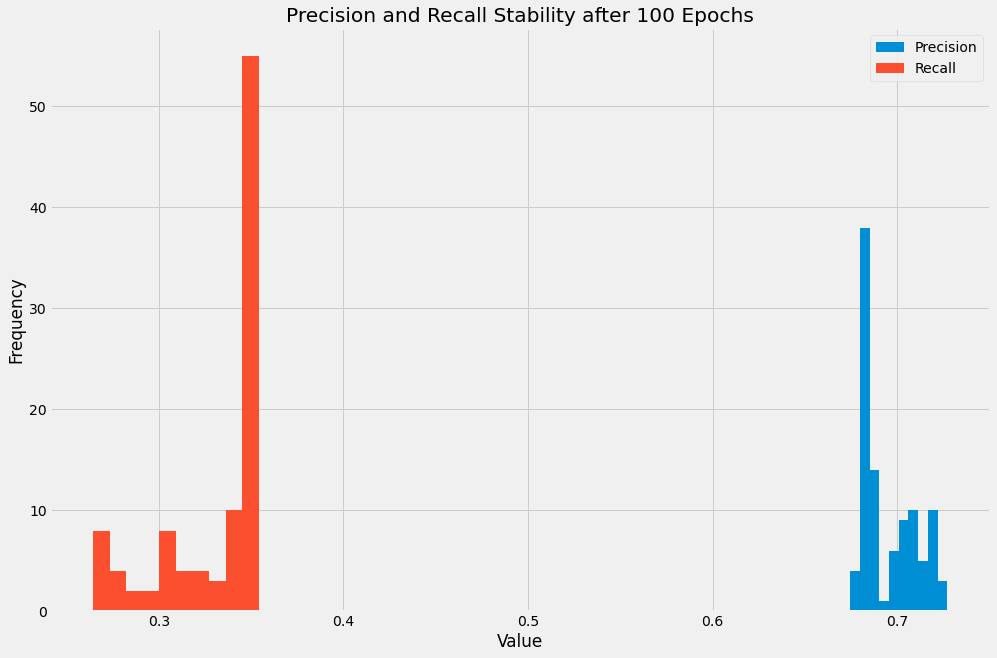

In [16]:


plt.hist(precision_scores)
plt.hist(recall_scores)
plt.title("Precision and Recall Stability after 100 Epochs")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(['Precision', 'Recall'])
plt.savefig("StableNetwork.png")

In [20]:
nn.train(100)

Epoch 1/100
625/625 [==============================] - 0s 558us/step - loss: 0.2367
Epoch 2/100
625/625 [==============================] - 0s 575us/step - loss: 0.2392
Epoch 3/100
625/625 [==============================] - 0s 586us/step - loss: 0.2392
Epoch 4/100
625/625 [==============================] - 0s 618us/step - loss: 0.2393
Epoch 5/100
625/625 [==============================] - 0s 538us/step - loss: 0.2369
Epoch 6/100
625/625 [==============================] - 0s 593us/step - loss: 0.2391
Epoch 7/100
625/625 [==============================] - 0s 563us/step - loss: 0.2356
Epoch 8/100
625/625 [==============================] - 0s 586us/step - loss: 0.2370
Epoch 9/100
625/625 [==============================] - 0s 586us/step - loss: 0.2342
Epoch 10/100
625/625 [==============================] - 0s 532us/step - loss: 0.2395
Epoch 11/100
625/625 [==============================] - 0s 581us/step - loss: 0.2385
Epoch 12/100
625/625 [==============================] - 0s 556us/step - lo

Epoch 97/100
625/625 [==============================] - 0s 591us/step - loss: 0.2347
Epoch 98/100
625/625 [==============================] - 0s 609us/step - loss: 0.2357
Epoch 99/100
625/625 [==============================] - 0s 635us/step - loss: 0.2353
Epoch 100/100
625/625 [==============================] - 0s 543us/step - loss: 0.2368


In [21]:
print(report(y_test, nn.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4599
         1.0       0.69      0.34      0.46       401

    accuracy                           0.93      5000
   macro avg       0.82      0.67      0.71      5000
weighted avg       0.92      0.93      0.92      5000



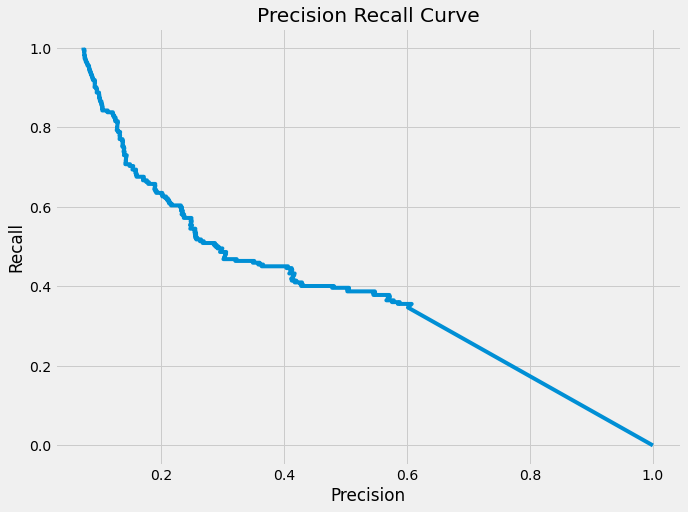

In [35]:
from sklearn.metrics import precision_recall_curve

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10,7.5]

precision_nn, recall_nn, _ = precision_recall_curve(y_val ,nn.predict_proba(x_val))

plt.title("Precision Recall Curve")
plt.plot(precision_nn, recall_nn)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.savefig("pr_curve_nn.png")

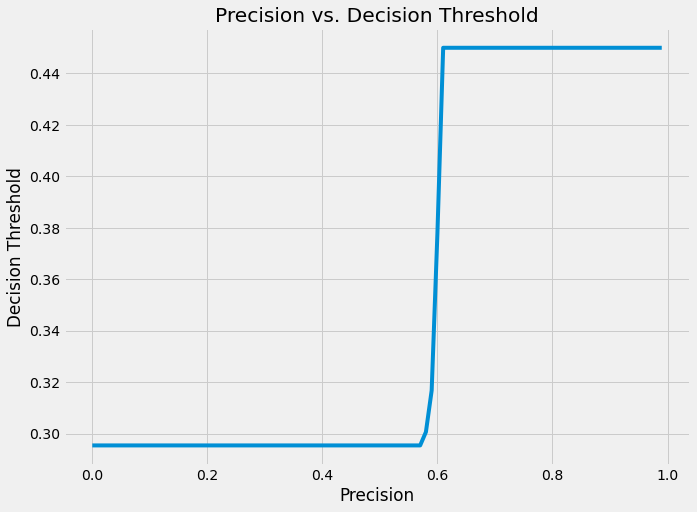

In [25]:
def tune_threshold(y, y_prob, eta = 0.1, plev = 0.5, max_iter = 100, output = True):
    """
    Tunes the threshold of the decision rule to improve accuracy.
    
    Keyword Arguments: 
    y - theground truth
    y_prob - the model predictions
    eta - learning rate 
    plev - the level of precision we are trying to maintain
    """
    threshold = 0.5
    yhat = decide(y_prob, threshold)
    p = precision(y, yhat)
    r = recall(y, yhat)
    initial_loss = directional_loss(y, yhat)
    if output: 
        print(f"Precision = {p}, Recall = {r}, Threshold = {threshold}")
    
    for i in range(1, max_iter): 
        threshold -= eta/i*threshold
        yhat = decide(y_prob, threshold)
        
        
        p = precision(y, yhat)
        r = recall(y, yhat)
        
        if output: 
            print(f"Precision = {p}, Recall = {r}, Threshold = {threshold}")
        
        if (p <= plev): 
            return threshold
            
    return threshold

y_prob = nn.predict_proba(x_val)

plevels = [_ for _ in np.arange(0, 1, 0.01)]
thresholds = []

for p in plevels: 
    thresholds.append(tune_threshold(y_val, y_prob, plev = p, output = False))
    
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 7.5]

plt.plot(plevels, thresholds)
plt.xlabel("Precision")
plt.ylabel("Decision Threshold")
plt.title("Precision vs. Decision Threshold")
plt.savefig("precisionvsthreshold_nn.png")

In [34]:
threshold = tune_threshold(y_val, y_prob, plev=0.55, max_iter = 1000, output = False)
print(threshold)
print(report(y_test, decide(nn.predict_proba(x_test), threshold)))

0.26020183606304553
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      4599
         1.0       0.62      0.38      0.47       401

    accuracy                           0.93      5000
   macro avg       0.78      0.68      0.72      5000
weighted avg       0.92      0.93      0.92      5000



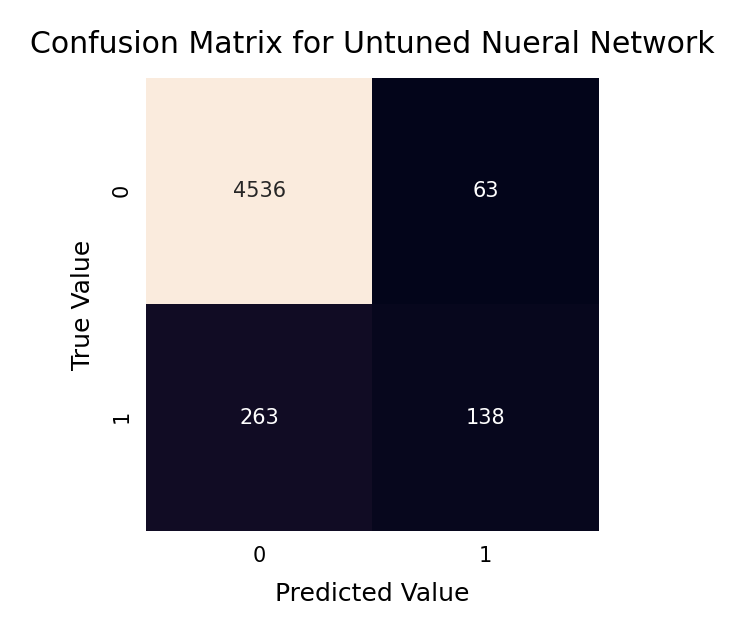

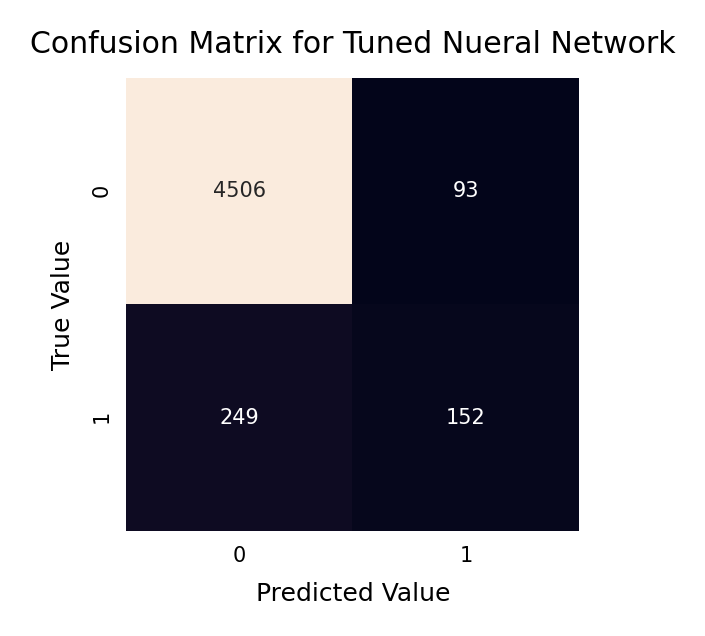

In [156]:

def plot_conf_mat(title, conf_mat, save = None): 
    plt.rcParams["figure.figsize"] = [2, 2]
    plt.rcParams["font.size"] = 5
    plt.rcParams["figure.dpi"] = 300
    sn.heatmap(conf_mat, 
                square = True,
                fmt = 'g',
                annot = True,
                cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.title(title)
    if save: 
        plt.savefig(save)
        plt.show()
    else: 
        plt.show()
        
plot_conf_mat("Confusion Matrix for Untuned Nueral Network", 
              confusion_matrix(y_test, nn.predict(x_test)), 
              "untuned_nn_confmat.png")

plot_conf_mat("Confusion Matrix for Tuned Nueral Network", 
             confusion_matrix(y_test, decide(nn.predict_proba(x_test), threshold = 0.2602)), 
              "tuned_nn_confmat.png")

In [128]:
confusion_matrix(y_test, nn.predict(x_test))

array([[4536,   63],
       [ 263,  138]], dtype=int64)

In [103]:
def explain(x_mean, x_obs,  model): 
    """
    Generates a list of numbers coresonding to how strong its influence is on
    the outcome of the model. Works with comparing probabilities 
    """
    
    mean_prob = model.predict_proba(np.array([x_mean,])) 
    predictive_strength = []
    
    for i in range(len(x_obs)): 
        x_mean_copy = x_mean.copy()
        x_mean_copy[i] = x_obs[i] - x_mean[i]
        
        changed_prob = model.predict_proba(np.array([x_mean_copy,]))
        predictive_strength.append((changed_prob)[0])
        
    return predictive_strength

x_mean = x_test.mean(axis = 0)
x_obs45 = x_test[:][45]

print(nn.predict_proba(np.array([x_mean,])))

explain(x_mean, x_obs45, nn)
credit_data = load_data("../data/Simulated_Data_Train.csv", as_df = True)


explain_df = pd.DataFrame.from_dict({col: val for col, val in zip(credit_data.columns, explain(x_mean, x_obs, nn))}, 
                                      "index", columns = ["Person45"])

x_obs1 = x_test[:][1]
explain_df["Person1"] = explain(x_mean, x_obs1, nn)
explain_df.to_latex("../report/explain.tex")

[0.21395627]


In [112]:
average_customer = x_mean.copy()
bank_customer = x_mean.copy()

average_customer[13] = 0
bank_customer[13] = 1

print(average_customer)
print(bank_customer)


print(nn.predict_proba(np.array([average_customer, ])))
print(nn.predict_proba(np.array([bank_customer, ])))

[9.45983352e+04 1.42712072e+04 2.97455400e+02 1.50363200e+02
 2.68507200e+02 2.96000000e-02 3.09524886e+02 1.75280000e+00
 3.38560000e+00 5.03483253e-01 5.14553221e-01 5.09252400e-01
 4.88634565e-01 0.00000000e+00 7.54611219e+04 1.47600000e-01
 1.51600000e-01 1.48200000e-01 1.36600000e-01 1.45600000e-01
 1.32800000e-01 4.98000000e-02 2.22000000e-02 5.40000000e-03
 4.00000000e-04 2.40000000e-02 2.20000000e-03 1.45000000e-01
 6.20000000e-03 8.52600000e-01 4.00000000e-04]
[9.45983352e+04 1.42712072e+04 2.97455400e+02 1.50363200e+02
 2.68507200e+02 2.96000000e-02 3.09524886e+02 1.75280000e+00
 3.38560000e+00 5.03483253e-01 5.14553221e-01 5.09252400e-01
 4.88634565e-01 1.00000000e+00 7.54611219e+04 1.47600000e-01
 1.51600000e-01 1.48200000e-01 1.36600000e-01 1.45600000e-01
 1.32800000e-01 4.98000000e-02 2.22000000e-02 5.40000000e-03
 4.00000000e-04 2.40000000e-02 2.20000000e-03 1.45000000e-01
 6.20000000e-03 8.52600000e-01 4.00000000e-04]
[0.21641025]
[0.20692515]
